In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import defaultdict
res_out = defaultdict(lambda: defaultdict(list))
import numpy as np
import math

In [15]:
def normm(x):
    return (x-x.min())/(x.max()-x.min())

In [5]:
df=pd.read_csv('/data/code_yang/cfbe/asna/data/uncertainty.csv')
df

,Unnamed: 0,dataset,al,ep,user_noise,item_noise
0,0,movielens,0.0410,0.0009,0.1358,0.0014
1,1,pinterest,0.0675,0.0090,0.3282,0.0005
2,2,yelp2018,0.0772,0.0217,0.4135,0.1510
3,3,gowalla,0.0883,0.0489,0.4530,0.2407


In [6]:
bar_width = 0.3  # 条形宽度
dataset_sel =['Movielens', 'Pinterest', 'Yelp2018', 'Gowalla']

In [8]:
index_male = np.arange(len(df['al'].values))
index_female = index_male + bar_width

In [25]:
df['ep'].iloc[3]

0.0489

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


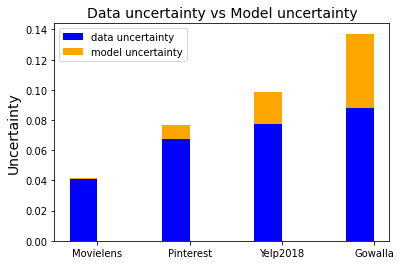

In [31]:
# cols=['#4169E1', '#3CB371', '#FFD700']
cols=['b', 'orange']

plt.bar(index_male, df['al'].values,  width=bar_width, color=cols[0], label='data uncertainty')
plt.bar(index_male, df['ep'].values,  bottom=df['al'].values, width=bar_width, color=cols[1], label='model uncertainty')
plt.legend()
plt.xticks(index_male + bar_width/2, dataset_sel)  # 让横坐标轴刻度显示 waters 里的饮用水， index_male + bar_width/2 为横坐标轴刻度的位置
plt.ylabel('Uncertainty',fontsize=14)  # 纵坐标轴标题
plt.title('Data uncertainty vs Model uncertainty', fontsize=14)  # 图形标题
plt.savefig('/data/code_yang/cfbe/asna/pic/uncertainty.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


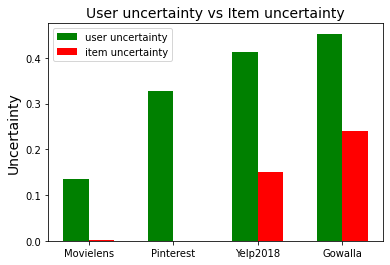

In [10]:
plt.bar(index_male, df['user_noise'].values,  width=bar_width, color='g', label='user uncertainty')
plt.bar(index_female, df['item_noise'].values,  width=bar_width, color='r', label='item uncertainty')
plt.legend()
plt.xticks(index_male + bar_width/2, dataset_sel)  # 让横坐标轴刻度显示 waters 里的饮用水， index_male + bar_width/2 为横坐标轴刻度的位置
plt.ylabel('Uncertainty',fontsize=14)  # 纵坐标轴标题
plt.title('User uncertainty vs Item uncertainty',fontsize=14)
plt.savefig('/data/code_yang/cfbe/asna/pic/noise.eps')

In [55]:
dataset = 'movielens'
name_pre ='Movielens'

In [56]:
H_df=pd.read_csv('/data/code_yang/cfbe/asna/data/{}/h_df.csv'.format(dataset))
pp = H_df.groupby('user').mean()
pps = pp.sort_values(by='ent')
std_arr = np.load('/data/code_yang/cfbe/asna/data/{}/user_std.npy'.format(dataset))
ss_arr = np.load('/data/code_yang/cfbe/asna/data/{}/user_size.npy'.format(dataset))
iii = np.where((ss_arr>=np.quantile(ss_arr,0.01)) & (ss_arr<=np.quantile(ss_arr,0.99)))[0]
jjj = np.where((std_arr>=np.quantile(std_arr,0.01)) & (std_arr<=np.quantile(std_arr,0.99)))[0]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


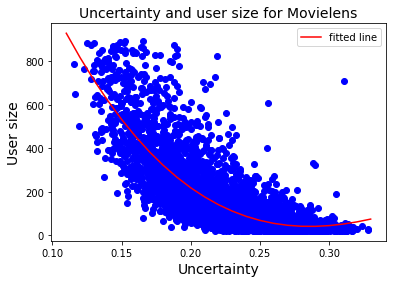

In [60]:
# plt.plot(range(len(iii)), normm(ss_arr[iii]), color=cols[0])
# plt.plot(range(len(iii)), normm(pps['ent'].values[iii]), color='r')
x = pps['ent'].values[iii]
y = ss_arr[iii]
plt.scatter(x,y, color='b')
plt.title('Uncertainty and user size for '+name_pre, fontsize=14)
# plt.legend(['size', 'uncertainty'])
plt.xlabel('Uncertainty', fontsize=14)
plt.ylabel('User size', fontsize=14)

linear_model=np.polyfit(x,y,3)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0.11,0.33, 0.01)
plt.plot(x_s,linear_model_fn(x_s),color="r")
plt.legend(['fitted line'])

plt.savefig(('/data/code_yang/cfbe/asna/pic/{}_size_2.eps').format(dataset))
# plt.savefig('/data/code_yang/cfbe/asna/pic/yelp2018_size.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


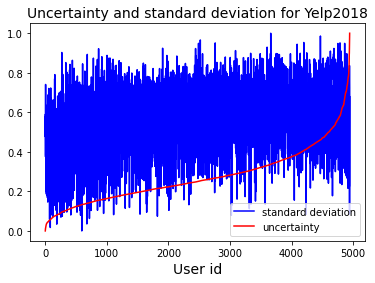

In [33]:
plt.plot(range(len(iii)), normm(std_arr[iii]), color=cols[0])
plt.plot(range(len(iii)), normm(pps['ent'].values[iii]), color='r')
plt.title('Uncertainty and standard deviation for '+name_pre, fontsize=14)
plt.legend(['standard deviation', 'uncertainty'])
plt.xlabel('User id', fontsize=14)
# np.corrcoef(pps['ent'].values[jjj], std_arr[jjj])
plt.savefig(('/data/code_yang/cfbe/asna/pic/{}_std.eps').format(dataset))
# plt.savefig(("/code/r9/matching/be/pic/std_{}.pdf").format(name))

In [92]:
dataset = 'pinterest'
name_pre ='Pinterest'

In [93]:
df_res = pd.read_csv('/data/code_yang/cfbe/asna/data/server/res_all_{}.csv'.format(dataset))
df_res['models'] = df_res['models'].apply(lambda x: "lightgcn" if x == "lightngcn3dropout0" else x)
dd = df_res.groupby(['models', 'loss']).mean().reset_index()
# dd=dd.sort_values(by='hr', ascending=False)
dd['models'] = dd['models'].apply(lambda x:x.upper())
dd['loss'] = dd['loss'].map({'bpr':'Pairwise', 'point':'Pointwise', 'list':'Listwise'})
dd = dd[dd['models'].isin(['MFBESVD', 'MFSVD', 'MFG', 'NMF', 'ITEMCF'])]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


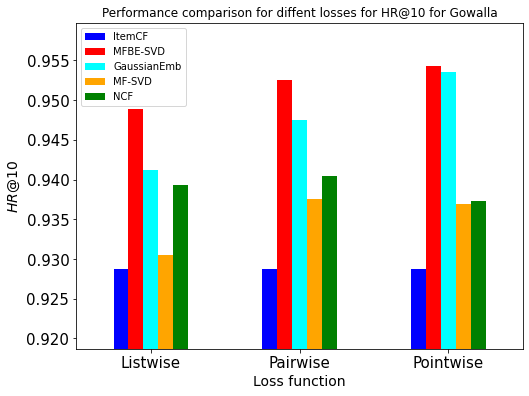

In [91]:
plt.rcParams['pdf.fonttype'] = 42
ddd = pd.Series([float(x) for x in dd['hr'].values], index = [dd['loss'], dd['models']])
ddd.unstack().plot.bar(rot=360, figsize=(8,6), fontsize=15, color = ['b', 'r', 'cyan', 'orange', 'g'])
plt.ylabel('$HR@10$', fontsize=14)  # 纵坐标轴标题
plt.xlabel("Loss function", fontsize=14)
plt.ylim([dd['hr'].min()-0.01, dd['hr'].max()+0.0055])
# plt.ylim([0.832, 0.967])
plt.title('Performance comparison for diffent losses for HR@10 for {}'.format(name_pre))
plt.legend(['ItemCF', 'MFBE-SVD', 'GaussianEmb', "MF-SVD",  "NCF"], loc='upper left')
plt.savefig("/data/code_yang/cfbe/asna/pic/{}_hr.eps".format(dataset), dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


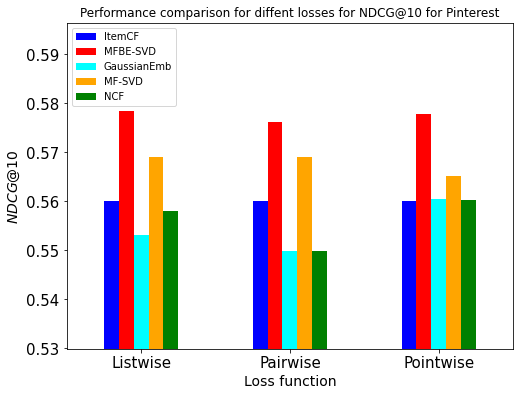

In [99]:
plt.rcParams['pdf.fonttype'] = 42
ddd = pd.Series([float(x) for x in dd['ndcg'].values], index = [dd['loss'], dd['models']])
ddd.unstack().plot.bar(rot=360, figsize=(8,6), fontsize=15, color = ['b', 'r', 'cyan', 'orange', 'g'])
plt.ylabel('$NDCG@10$', fontsize=14)  # 纵坐标轴标题
plt.xlabel("Loss function", fontsize=14)
# plt.ylim([0.553, 0.767])
plt.ylim([dd['ndcg'].min()-0.02, dd['ndcg'].max()+0.018])
plt.title('Performance comparison for diffent losses for NDCG@10 for {}'.format(name_pre))
plt.legend(['ItemCF', 'MFBE-SVD', 'GaussianEmb', "MF-SVD", "NCF"], loc='upper left')
plt.savefig("/data/code_yang/cfbe/asna/pic/{}_ndcg.eps".format(dataset), dpi=300)

<Figure size 432x288 with 0 Axes>